<a href="https://colab.research.google.com/github/Aashishc-prog/CardioVascular-Risk-Prediction/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBRFClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
!pip install shap
import shap
shap.initjs()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [2]:
#Mounting drive
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/data_cardiovascular_risk.csv').drop(columns=['id'])

#**EDA**

In [3]:
#Let's see how our dataset looks like
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [5]:
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


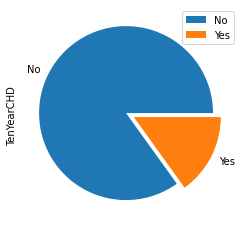

In [6]:
#Checking imbalance in target variable
pd.DataFrame(df['TenYearCHD'].replace({0:'No',1:'Yes'}).value_counts()).plot(kind='pie',y='TenYearCHD',explode = (0.05, 0.05))

##Null value treatment

In [7]:
#getting number of null values
value_nulldf = pd.DataFrame(df.isnull().sum(),columns=['value_counts'])
percent_null_df = pd.DataFrame(round(df.isnull().sum() * 100 / df.shape[0],2),columns=['percentage'])
fdf=pd.concat([value_nulldf, percent_null_df],axis=1)
fdf[fdf['value_counts']!=0]

,value_counts,percentage
education,87,2.57
cigsPerDay,22,0.65
BPMeds,44,1.30
totChol,38,1.12
BMI,14,0.41
heartRate,1,0.03
glucose,304,8.97


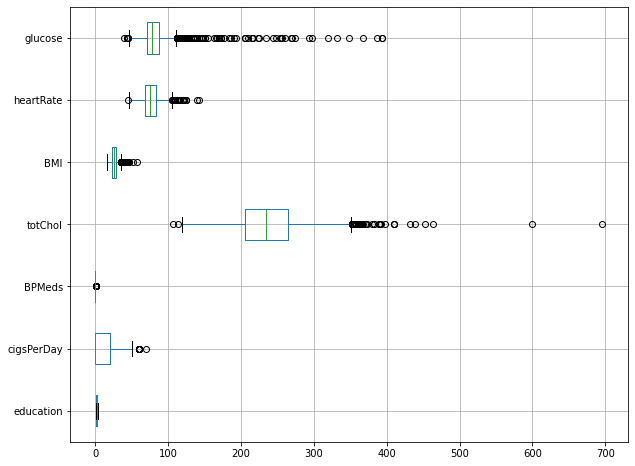

In [8]:
plt.figure(figsize=(10,8))
df[df.columns[df.isnull().any()].tolist()].boxplot(vert=False,figsize=(10,6)) #evaluating values to impute in null values
#Since almost all the datas are right skewed, we impute median value

In [9]:
##creating a copy of original untethered dataset
df1 = df.copy() 

In [10]:
#imputing null values with median
na_columns = df1.columns[df1.isnull().any()].tolist()
for col in na_columns:
  df1[col].fillna(df1[col].median(),inplace = True)

#Outlier treatment

In [11]:
#Now we divide the columns into numerical and categorical
categorical_columns = [col for col in df1.columns if len(df[col].unique())<=4]
numerical_columns = list(set(df1.columns) - set(categorical_columns))

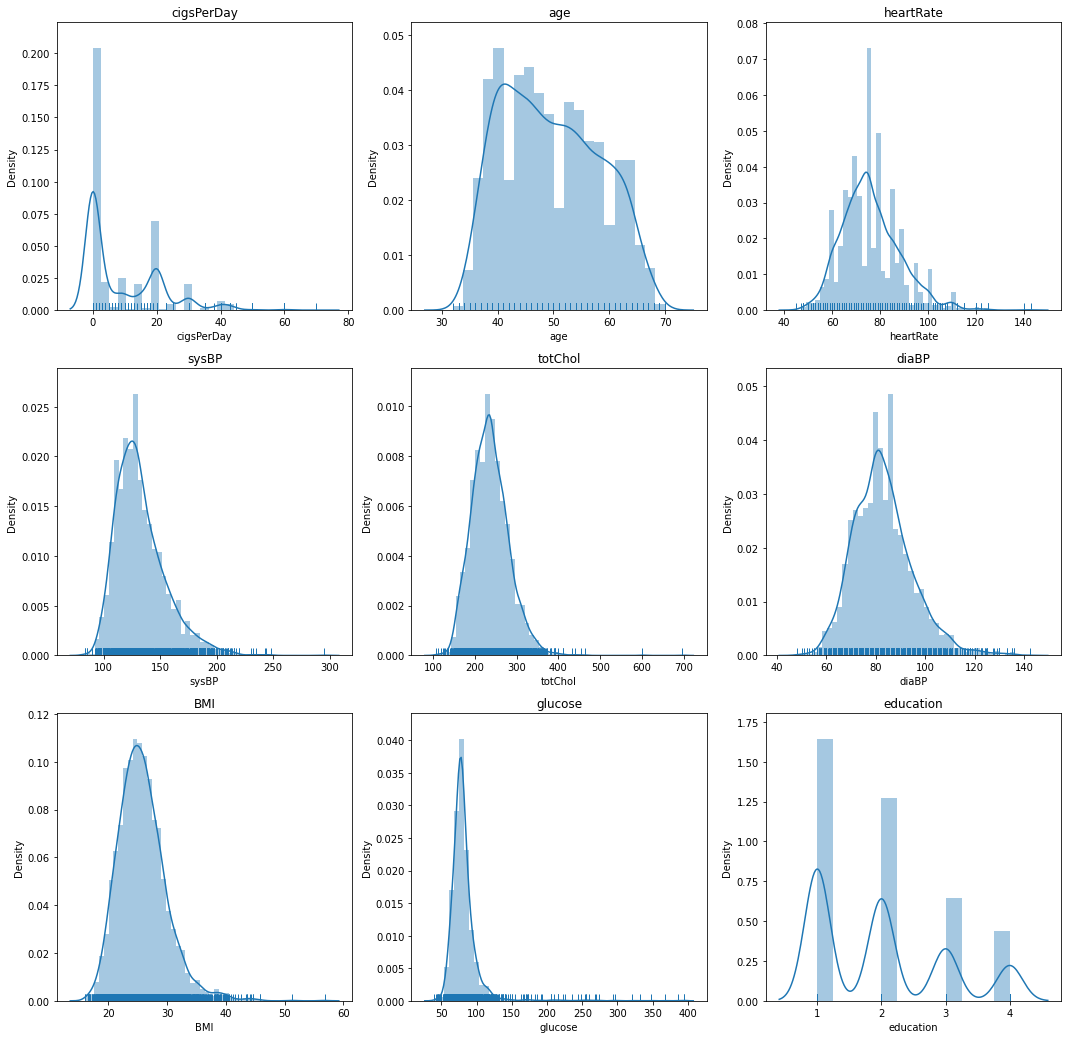

In [12]:
#getting distplot of numeric features
for i,col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  g=sns.distplot(df1[col], rug=True)
  g.figure.set_size_inches(18,18)
  plt.title(col)

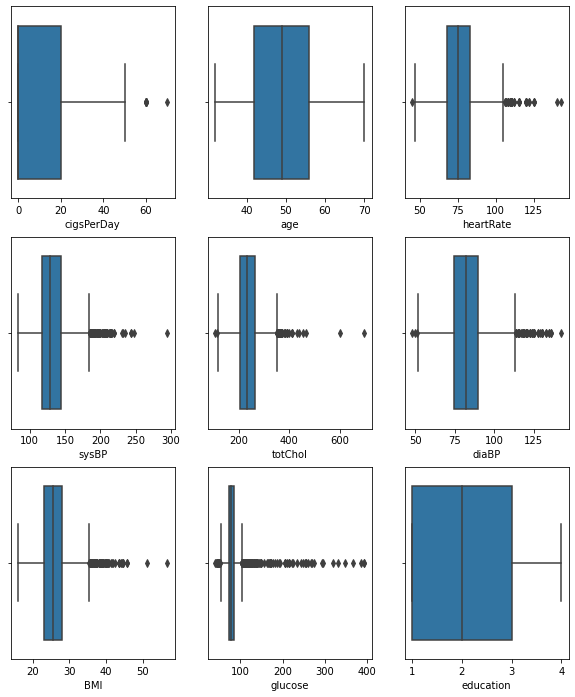

In [13]:
for i,col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  g=sns.boxplot(df1[col])
  g.figure.set_size_inches(10,12)

In [14]:
before_otlier_treatment_df = df1.copy()

In [16]:
#a function to replace outliers with a value
def replace_outliers(dataframe, columns):
  '''Takes dataframe and columns as a list then replaces them with value. value is median'''
  for col in columns:
    q1, q3 = dataframe[col].quantile([0.25,0.75])
    lower_limit = q1 - 1.5 * (q3 - q1)
    upper_limit = q3 + 1.5 * (q3 - q1)
    dataframe[col] = np.where(dataframe[col]<lower_limit,df1[col].median(),dataframe[col])
    dataframe[col] = np.where(dataframe[col]>upper_limit,df1[col].median(),dataframe[col])
  return dataframe.head()

In [17]:
#removing outliers
replace_outliers(df1,numerical_columns) 

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


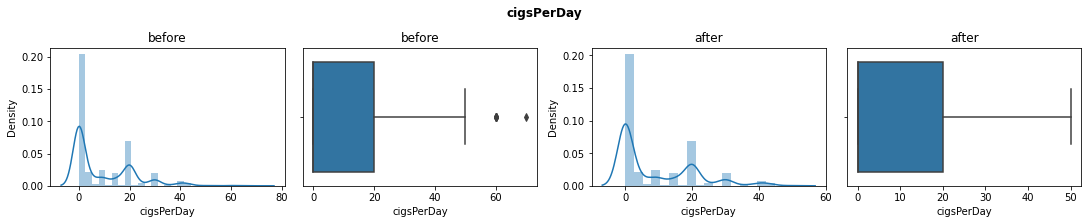

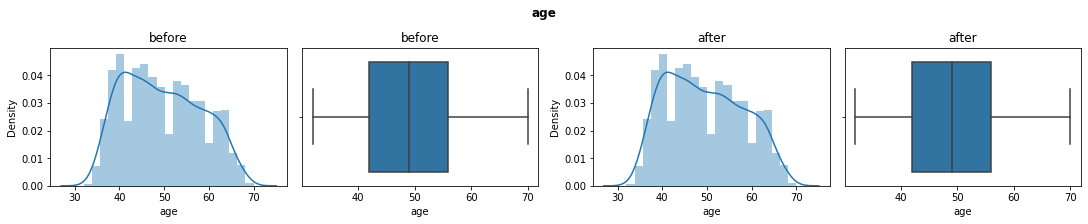

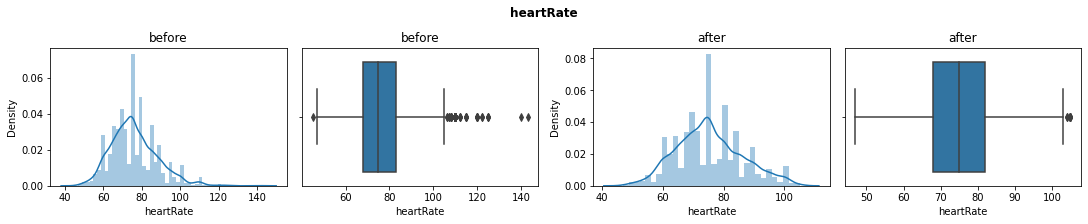

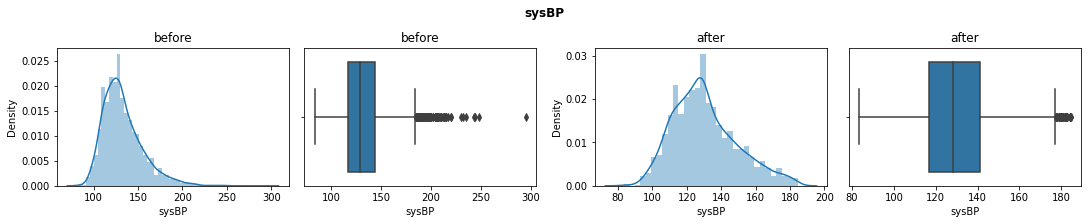

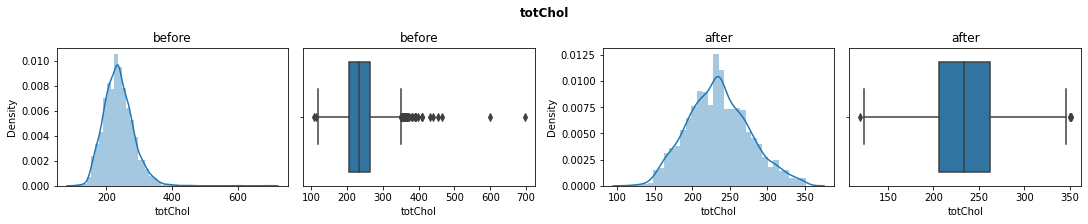

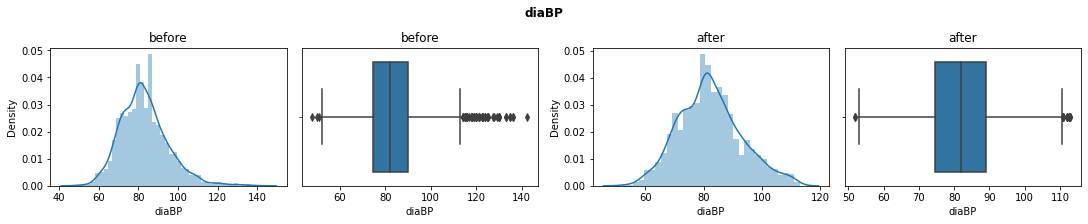

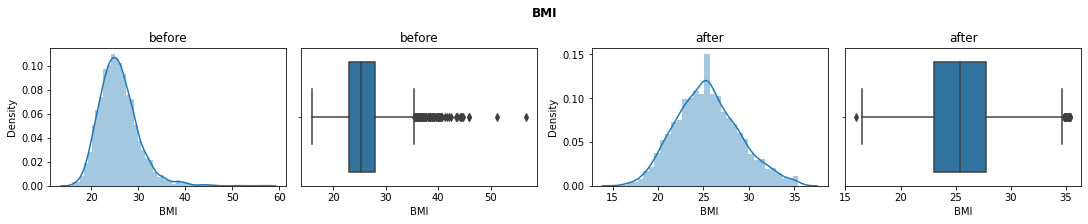

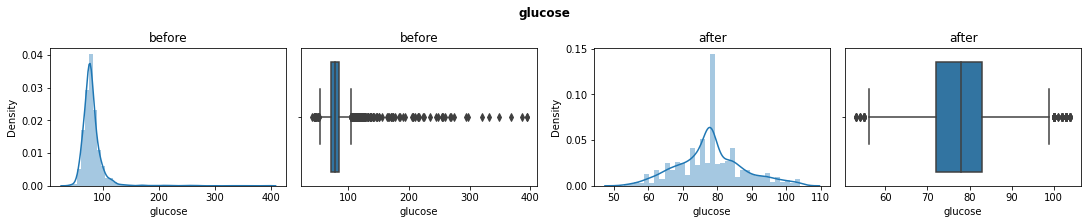

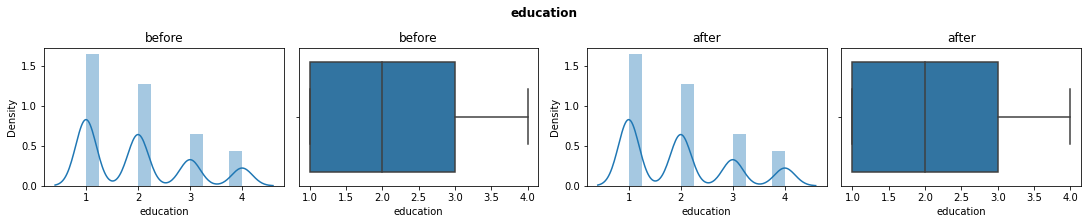

In [18]:
# now we plot the graphs for before and after outlier treatment
for col in numerical_columns:
  fig,ax = plt.subplots(1,4,constrained_layout = True)
  fig.set_size_inches(15,3)
  sns.distplot(before_otlier_treatment_df[col], ax = ax[0]).set(title='before')
  sns.boxplot(before_otlier_treatment_df[col],ax = ax[1]).set(title='before')
  #after outlier treatment
  sns.distplot(df1[col],ax=ax[2]).set(title='after')
  sns.boxplot(df1[col],ax=ax[3]).set(title='after')
  plt.suptitle(f'{col}', weight = 'bold')
  plt.show()
#at this point outliers from the numerical columns has been treated.... and now we work with categorical columns.

#Working with non-numeric values

In [19]:
 #So, categorical columns have no null values
df1[categorical_columns].isnull().sum()

sex                0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64

In [20]:
df_cat=df[categorical_columns]

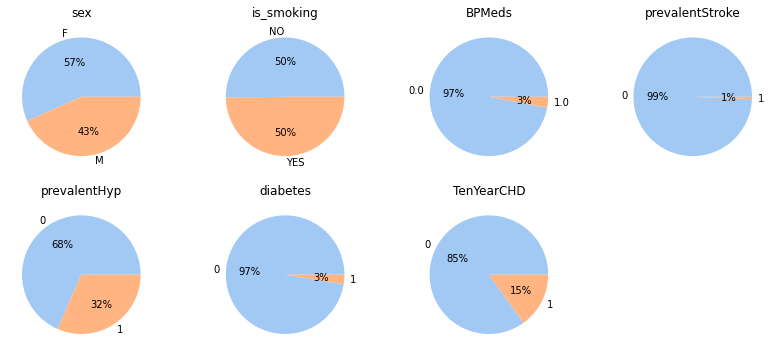

In [21]:
for i,col in enumerate(categorical_columns):
  t_df = pd.DataFrame(df1[col].value_counts())
  palette_color = sns.color_palette('pastel')
  keys = list(t_df.index)
  data = list(t_df[col])
  plt.rcParams["figure.figsize"] = (14,6)
  plt.subplot(2,4,i+1)
  plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  plt.title(col)       #this is the distribution and we don't have any null values in categorical columns, we do need to fix imbalance

In [22]:
#is_smoking is available from the number_of_cigs column so we remove it
#furthermore we change the sex column to numerical
df1.replace({'sex':{'M':1,'F':0}},inplace = True)
df1=df1.drop(columns=['is_smoking','diabetes','BPMeds','prevalentStroke'])

In [23]:
len(list(df1.columns))

12